In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df = pd.read_excel(r'C:\Users\Arpita\Desktop\Data file.xlsx')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


# EDA

In [3]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [7]:
df.shape

(209593, 37)

In [8]:
df.dtypes

Unnamed: 0                       int64
label                            int64
msisdn                          object
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30                int64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30              

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            209593 non-null  int64         
 1   label                 209593 non-null  int64         
 2   msisdn                209593 non-null  object        
 3   aon                   209593 non-null  float64       
 4   daily_decr30          209593 non-null  float64       
 5   daily_decr90          209593 non-null  float64       
 6   rental30              209593 non-null  float64       
 7   rental90              209593 non-null  float64       
 8   last_rech_date_ma     209593 non-null  float64       
 9   last_rech_date_da     209593 non-null  float64       
 10  last_rech_amt_ma      209593 non-null  int64         
 11  cnt_ma_rech30         209593 non-null  int64         
 12  fr_ma_rech30          209593 non-null  float64       
 13 

In [11]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


# Checking for null/missing values

In [5]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There are no null/missing values in the data set

<AxesSubplot:>

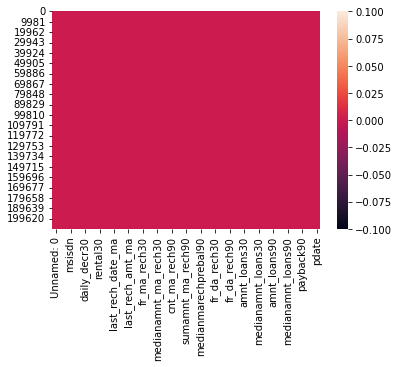

In [6]:
#visualizing null values
sns.heatmap(df.isnull())

As there are no white lines in the graph,it shows that there is no null values.

# Univariate Analysis

<AxesSubplot:xlabel='label', ylabel='count'>

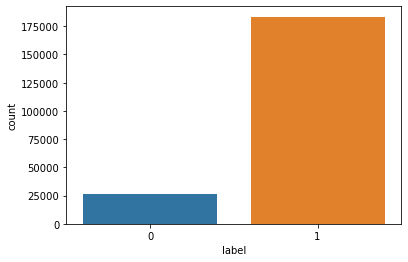

In [7]:
sns.countplot(df['label'])

From the graph we can see that the data is imbalanced

<AxesSubplot:xlabel='aon', ylabel='Density'>

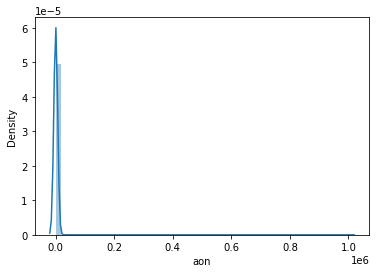

In [8]:
sns.distplot(df['aon'])

This column has normal distribution of data.

<AxesSubplot:xlabel='daily_decr30', ylabel='Count'>

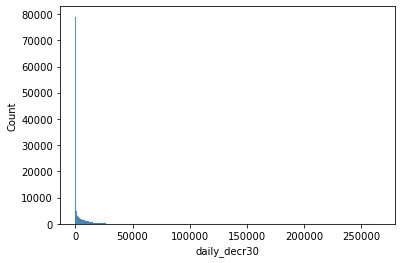

In [9]:
sns.histplot(df['daily_decr30'])

The data is normally distributed.

<AxesSubplot:xlabel='daily_decr90', ylabel='Count'>

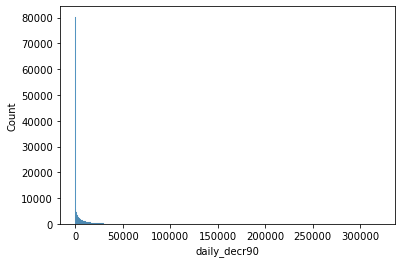

In [22]:
sns.histplot(df['daily_decr90'])

Here also the data is distributed normally. The column 'daily_decr30' and 'daily_decr90' have almost same data so we might drop them after checking the correlataion.

<AxesSubplot:xlabel='rental30', ylabel='Count'>

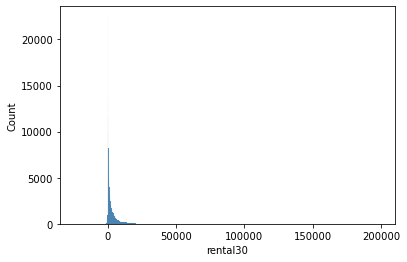

In [23]:
sns.histplot(df['rental30'])

The data is normally distributed.

<AxesSubplot:xlabel='rental90', ylabel='Count'>

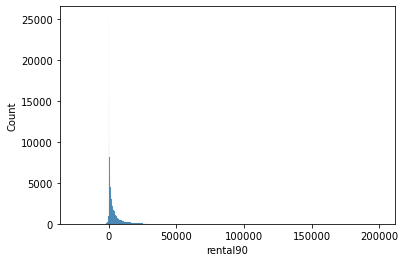

In [24]:
sns.histplot(df['rental90'])

Here also the data is distributed normally. The column 'rental30' and 'rental90' have almost same data so we might drop them after checking the correlataion.

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

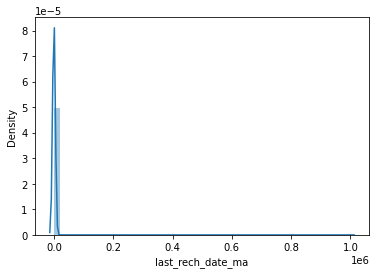

In [25]:
sns.distplot(df['last_rech_date_ma'])

Number of days till last recharge of main account has normal distribution of data.

<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

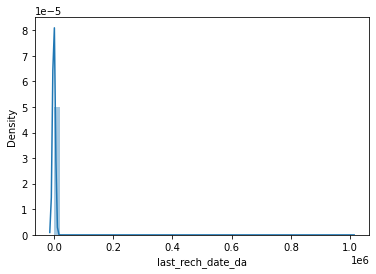

In [26]:
sns.distplot(df['last_rech_date_da'])

The column has normal distribution of data.

<AxesSubplot:xlabel='last_rech_amt_ma', ylabel='Density'>

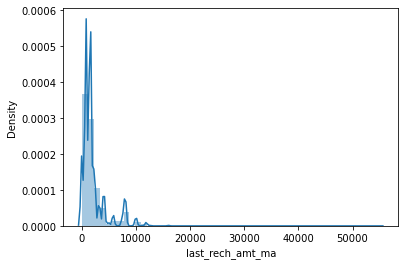

In [27]:
sns.distplot(df['last_rech_amt_ma'])

Here the data is not normally distributed

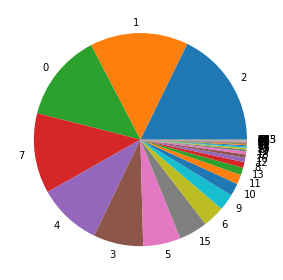

In [28]:
plt.pie(df['cnt_ma_rech30'].value_counts(), labels=df['cnt_ma_rech30'].unique(),shadow=False)
plt.tight_layout()
plt.show()

The main account got recharged Maximum 2 , 1 , 7 and 0 Number of times in last 30 days

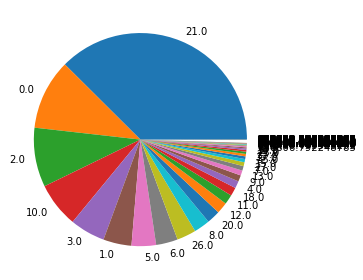

In [29]:
plt.pie(df['fr_ma_rech30'].value_counts(), labels=df['fr_ma_rech30'].unique(),shadow=False)
plt.tight_layout()
plt.show()

Maximum Frequency of main account recharged in last 30 days is 21.0

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='Density'>

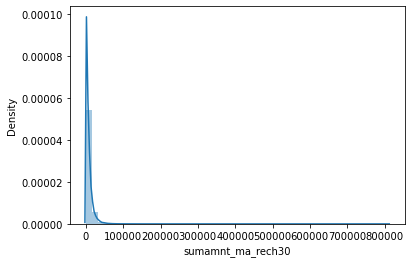

In [3]:
sns.distplot(df['sumamnt_ma_rech30'])

The data is normally distributed

<AxesSubplot:xlabel='medianamnt_ma_rech30', ylabel='Density'>

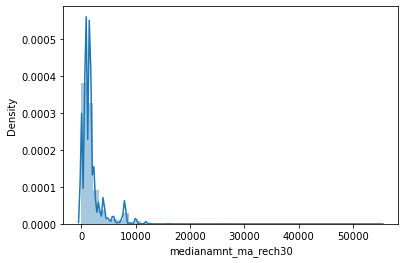

In [4]:
sns.distplot(df['medianamnt_ma_rech30'])

The graph shows that the data is not normally distributed.

<AxesSubplot:xlabel='medianmarechprebal30', ylabel='Density'>

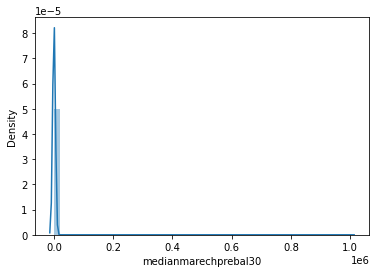

In [5]:
sns.distplot(df['medianmarechprebal30'])

The graph shows normal distribution of data.

<AxesSubplot:xlabel='cnt_ma_rech90'>

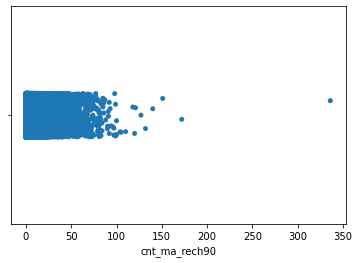

In [6]:
sns.stripplot(df['cnt_ma_rech90'])

It shows that the data is scattered in range 0 to 100

<AxesSubplot:xlabel='fr_ma_rech90', ylabel='Density'>

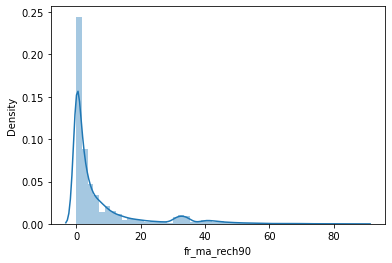

In [7]:
sns.distplot(df['fr_ma_rech90'])

It has almost normal distribution.

<AxesSubplot:xlabel='sumamnt_ma_rech90', ylabel='Density'>

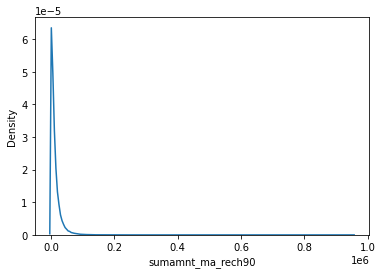

In [8]:
sns.kdeplot(df['sumamnt_ma_rech90'])

The graph shows noraml distribution of data.

<AxesSubplot:xlabel='medianamnt_ma_rech90'>

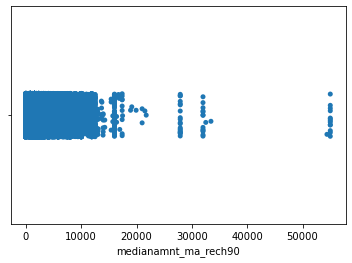

In [9]:
sns.stripplot(df['medianamnt_ma_rech90'])

This shows that it has maximum data scattered in range 0 t0 15000

<AxesSubplot:xlabel='medianmarechprebal90'>

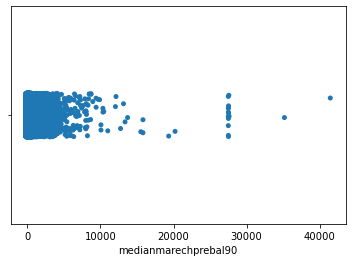

In [10]:
sns.stripplot(df['medianmarechprebal90'])

It has maximum data scattered in range of 0 to 7500

<AxesSubplot:xlabel='cnt_da_rech30', ylabel='Density'>

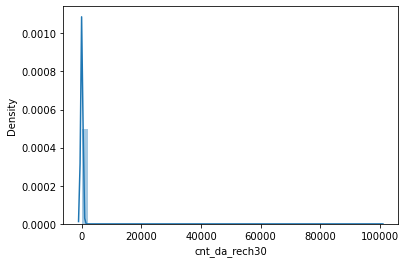

In [11]:
sns.distplot(df['cnt_da_rech30'])

It shows that is has normal distribution of data.

<AxesSubplot:xlabel='fr_da_rech30', ylabel='Density'>

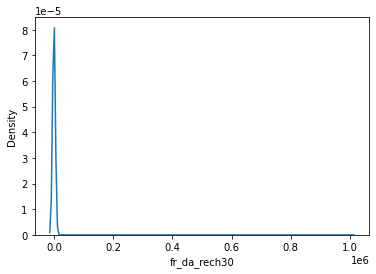

In [12]:
sns.kdeplot(df['fr_da_rech30'])

It has normal distribution of data.

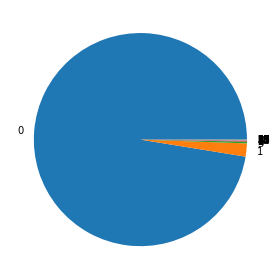

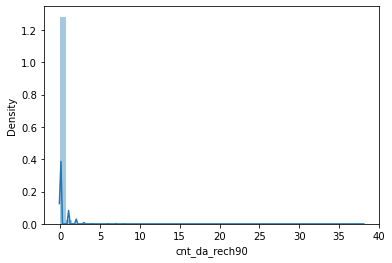

In [13]:
plt.pie(df['cnt_da_rech90'].value_counts(), labels=df['cnt_da_rech90'].unique(),shadow=False)
plt.tight_layout()
plt.show()
sns.distplot(df['cnt_da_rech90'])
plt.show()

The graph shows that the maximum data is valued at 0.

<AxesSubplot:xlabel='fr_da_rech90'>

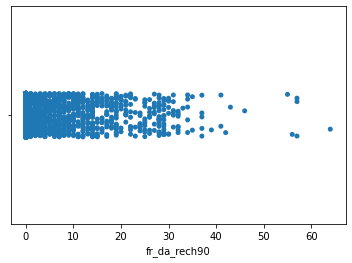

In [14]:
sns.stripplot(df['fr_da_rech90'])

It shows that the maxium data is scattered in the range 0 to 30

<AxesSubplot:xlabel='cnt_loans30', ylabel='Density'>

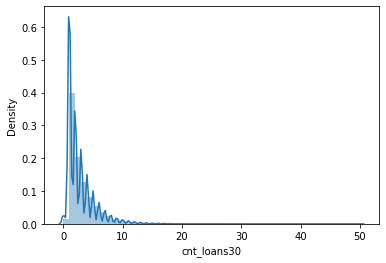

In [15]:
sns.distplot(df['cnt_loans30'])

The graph shows that the data is not normally distributed.

<AxesSubplot:xlabel='amnt_loans30'>

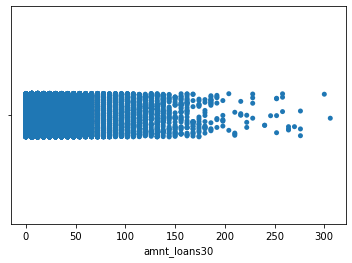

In [16]:
sns.stripplot(df['amnt_loans30'])

It shows that maximum data is scattered over the range 0 to 200.

<AxesSubplot:xlabel='maxamnt_loans30', ylabel='Density'>

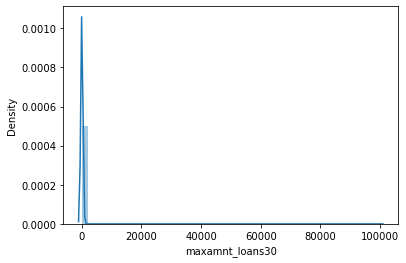

In [17]:
sns.distplot(df['maxamnt_loans30'])

The data is normally distributed

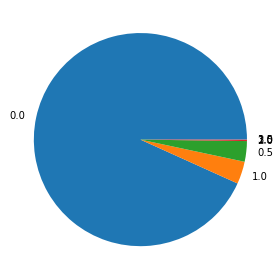

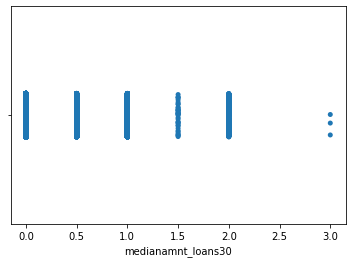

In [18]:
plt.pie(df['medianamnt_loans30'].value_counts(), labels=df['medianamnt_loans30'].unique(),shadow=False)
plt.tight_layout()
plt.show()
sns.stripplot(df['medianamnt_loans30'])
plt.show()

Median of amounts of loan taken by the user in last 30 days is 0, 5, 10, 15, 20 and 30

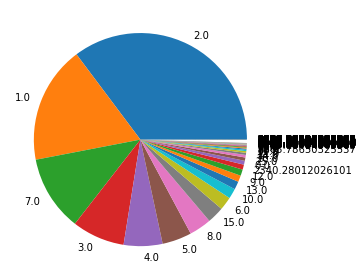

In [19]:
plt.pie(df['cnt_loans90'].value_counts(), labels=df['cnt_loans90'].unique(),shadow=False)
plt.tight_layout()
plt.show()

Maximum data is distributed at value 2.

<AxesSubplot:xlabel='amnt_loans90'>

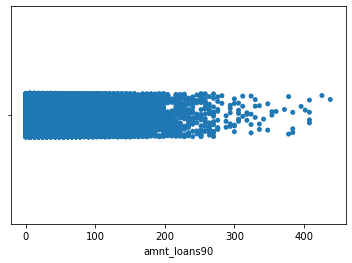

In [20]:
sns.stripplot(df['amnt_loans90'])

The data is highly densed from range 0 to 200.

<AxesSubplot:xlabel='maxamnt_loans90'>

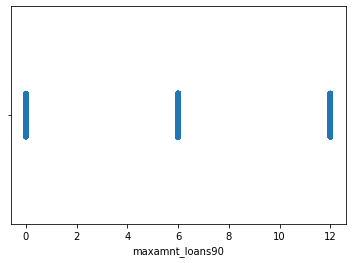

In [21]:
sns.stripplot(df['maxamnt_loans90'])

From the graph we can see that there is only 2 options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively. Otherwise it's 0.

<AxesSubplot:xlabel='medianamnt_loans90'>

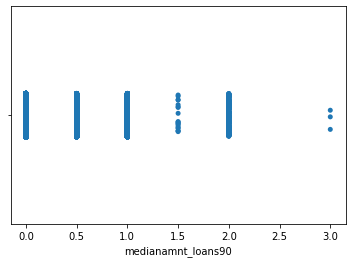

In [22]:
sns.stripplot(df['medianamnt_loans90'])

Median amount of loan taken by the user in last 90 days is 0, 5, 10, 15, 20 and 30.

<AxesSubplot:xlabel='payback30'>

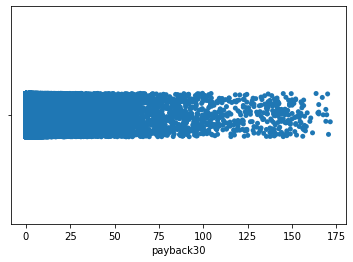

In [23]:
sns.stripplot(df['payback30'])

The data is very densed from range 0 to 100

<AxesSubplot:xlabel='payback90', ylabel='Density'>

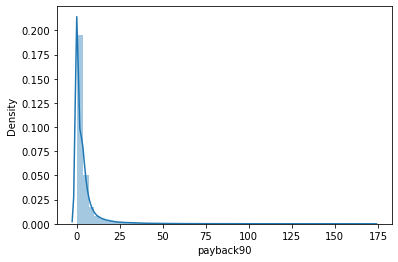

In [24]:
sns.distplot(df['payback90'])

The data is almost normally distributed.

<AxesSubplot:xlabel='pcircle', ylabel='Count'>

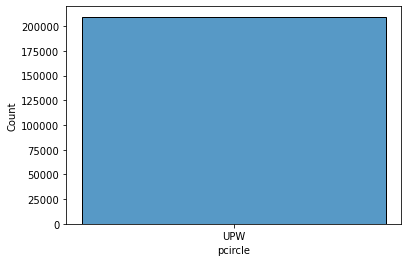

In [25]:
sns.histplot(df['pcircle'])

From graph we can assume that it has only 1 value, so we can drop this column later.

<AxesSubplot:xlabel='pdate', ylabel='Count'>

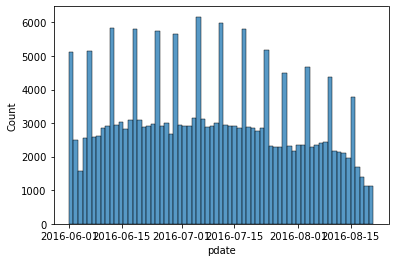

In [26]:
sns.histplot(df['pdate'])

The data is widely distributed.

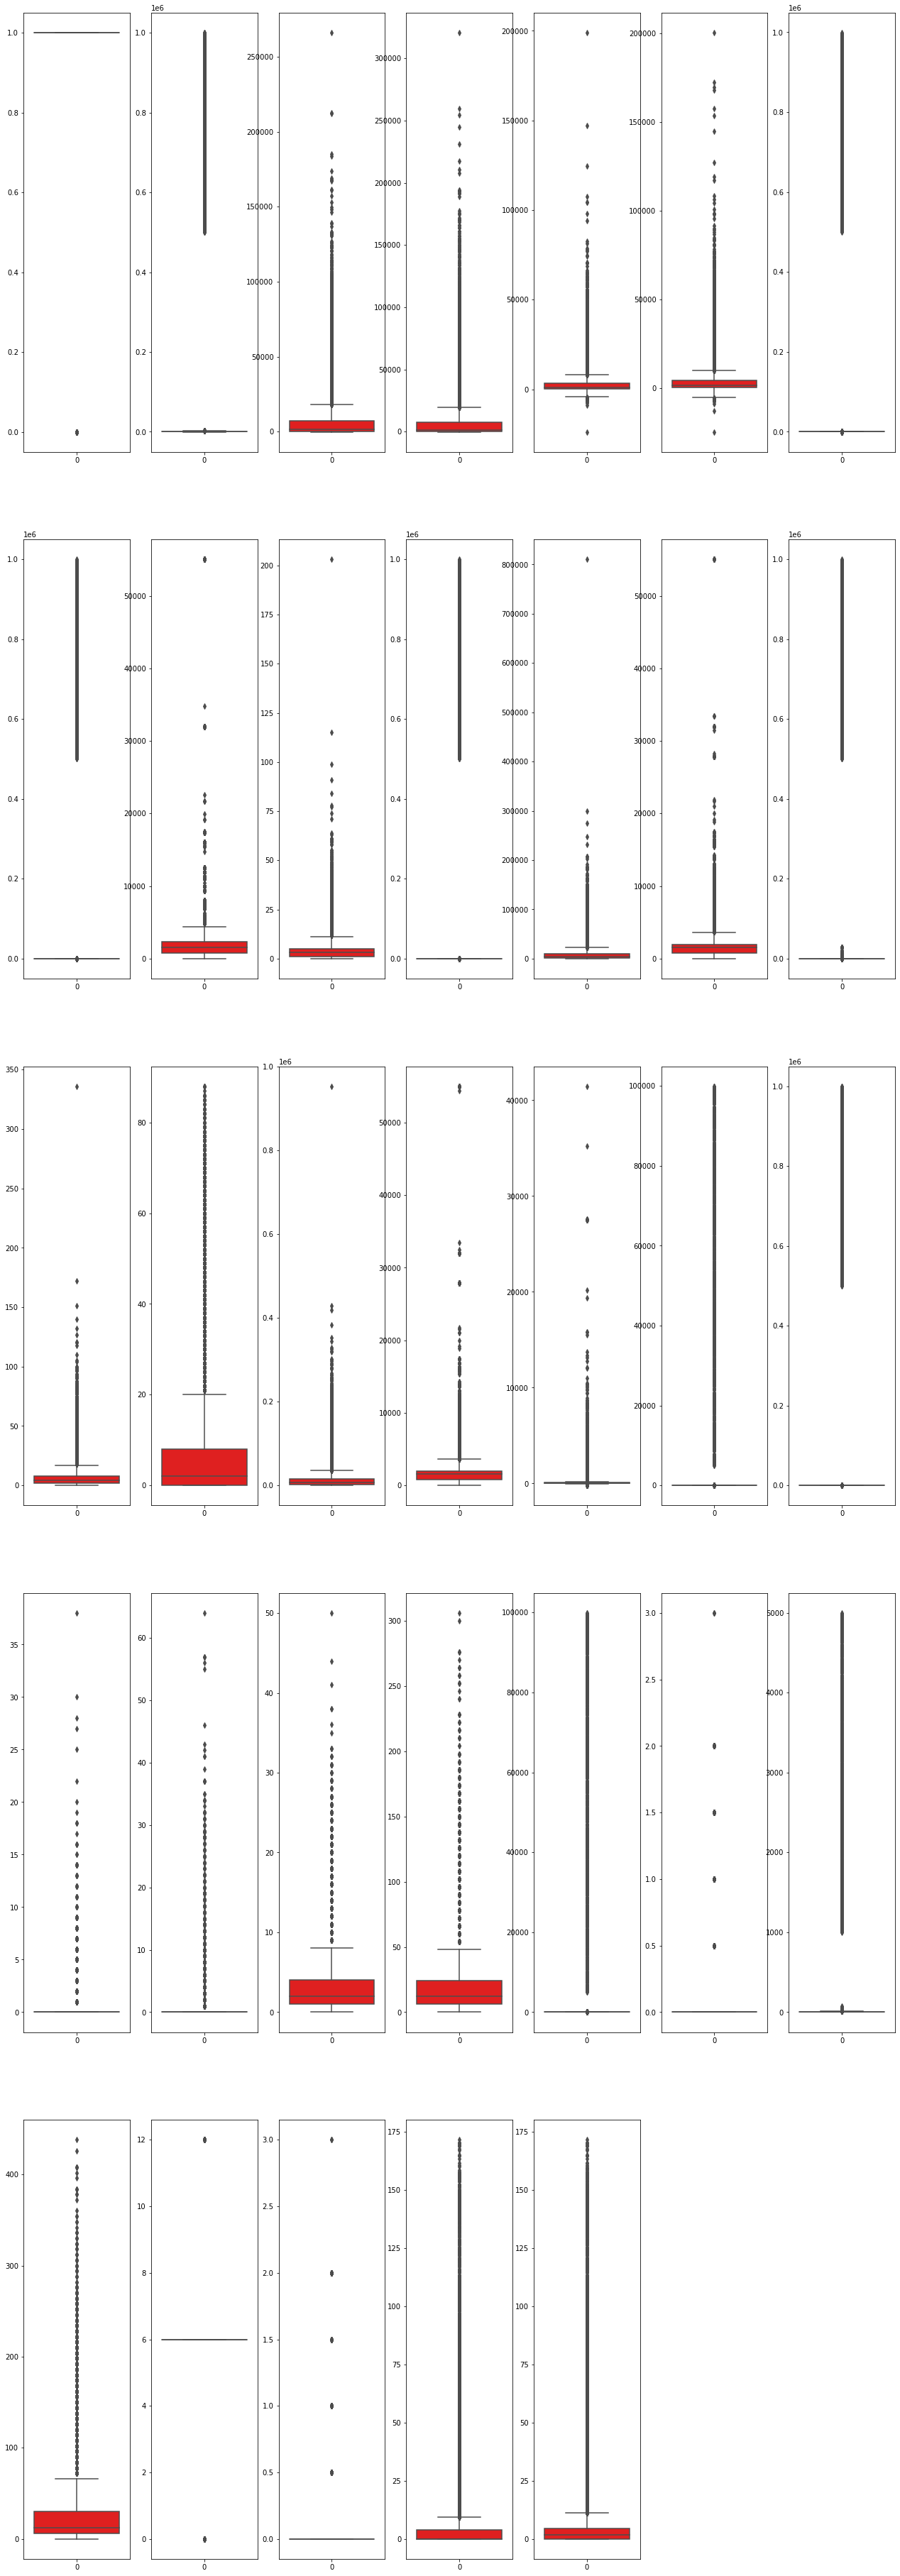

In [27]:
numcolnew= ['label', 'aon', 'daily_decr30', 'daily_decr90','rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']
ncol=22
nrows=8
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(numcolnew)):
    plt.subplot(5,7,i+1)
    sns.boxplot(data=df[numcolnew[i]],color='red',orient='v')

We can see that there are outliers in the data so we will remove them later.

# Bivariate Analysis

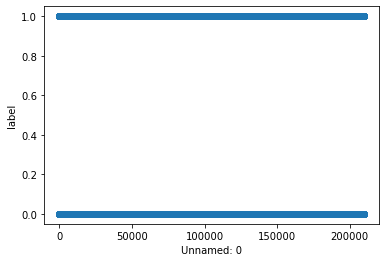

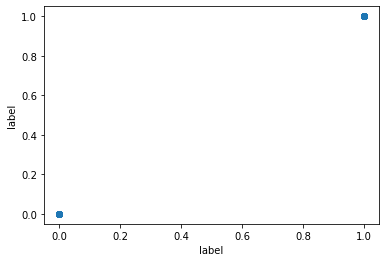

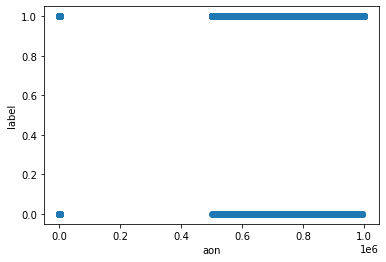

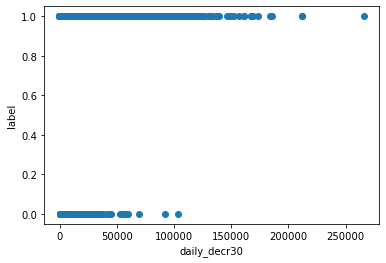

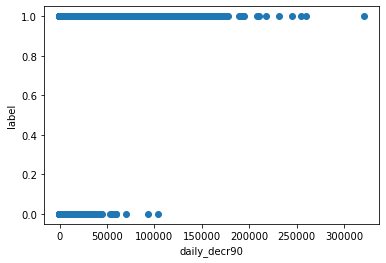

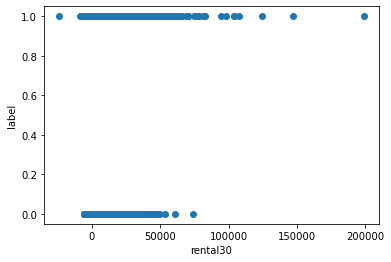

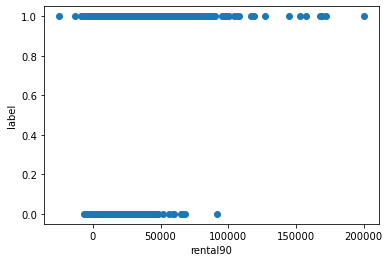

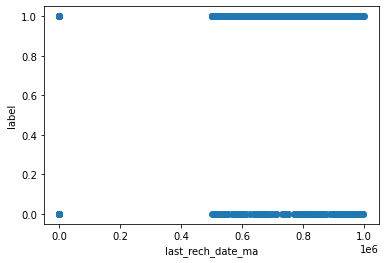

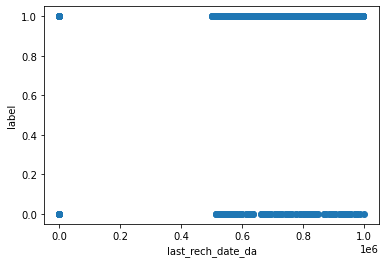

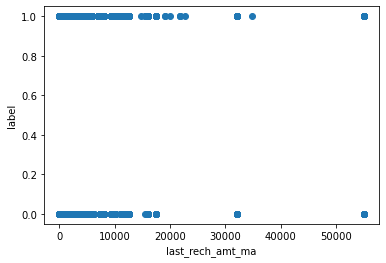

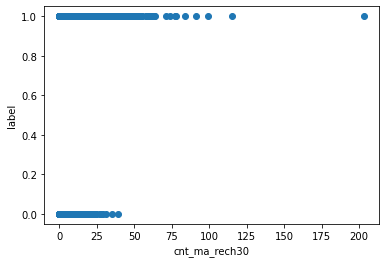

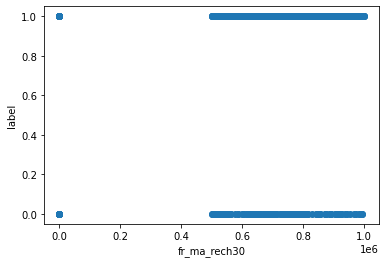

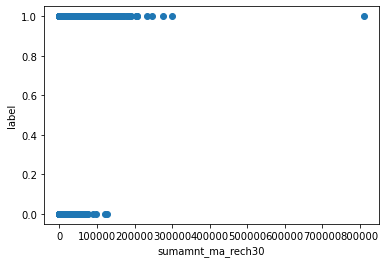

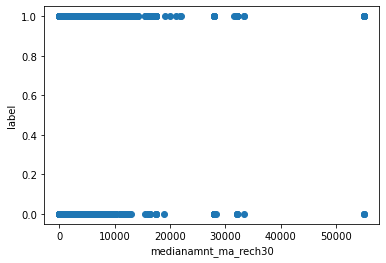

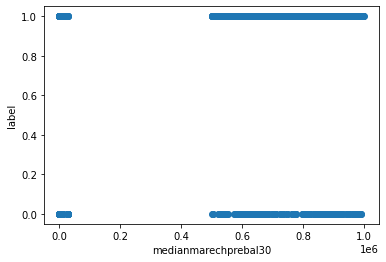

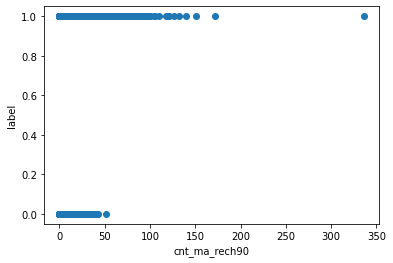

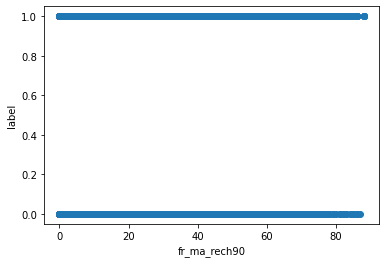

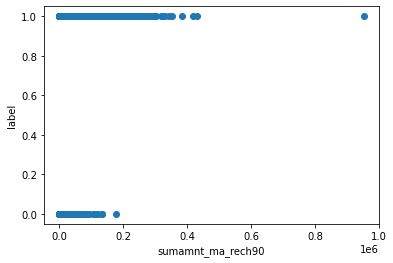

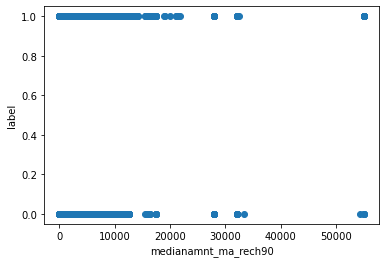

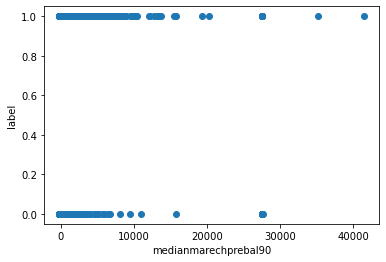

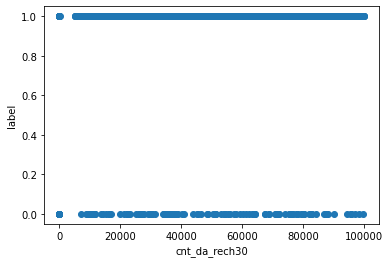

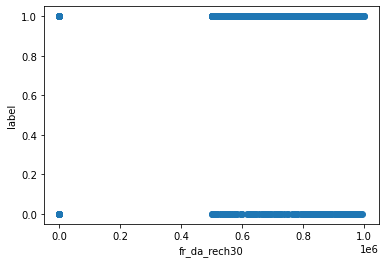

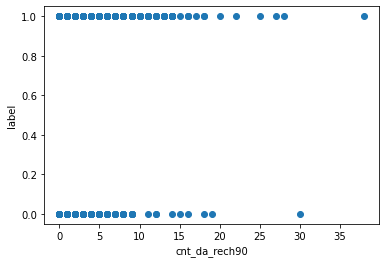

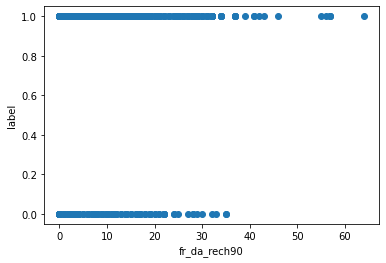

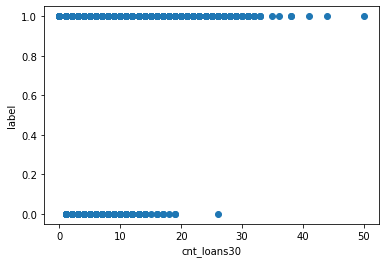

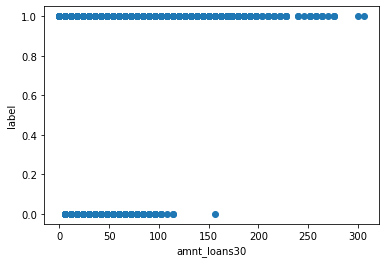

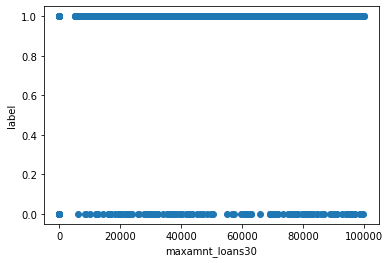

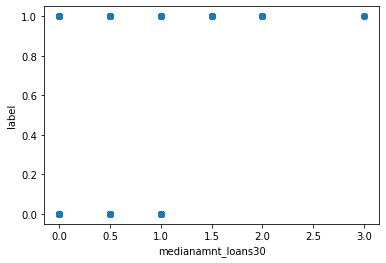

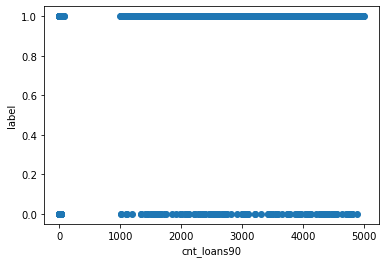

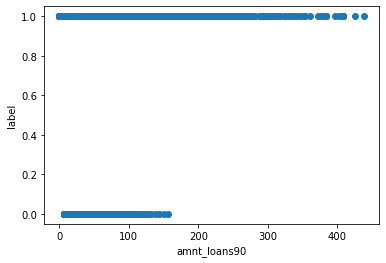

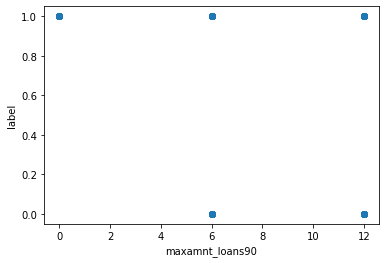

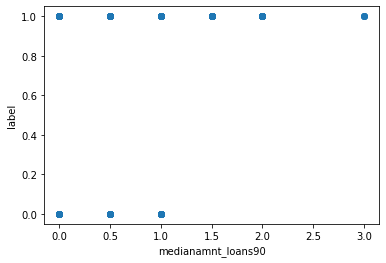

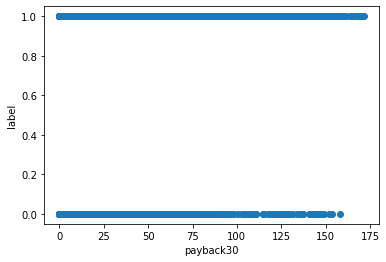

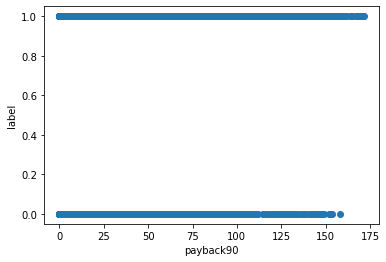

In [29]:
#Scatter plot between all feature variables and target variable

for col in df.describe().columns:
    data=df.copy()
    plt.scatter(data[col],data['label'])
    plt.xlabel(col)
    plt.ylabel('label')
    plt.show()

<Figure size 1296x576 with 0 Axes>

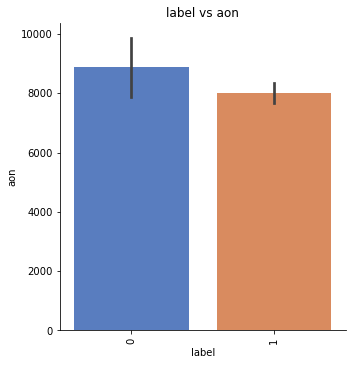

aon             label
-48.000000      1        120
                0         12
-47.000000      1         70
                0         14
-46.000000      1         77
                        ... 
 999190.832139  1          1
 999215.597054  1          1
 999391.307123  1          1
 999520.609388  1          1
 999860.755168  1          1
Name: label, Length: 6607, dtype: int64


In [30]:
#Factor plot of label vs aon
plt.figure(figsize=(18,8))
sns.factorplot(x='label',y='aon',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('label vs aon')
plt.xticks(rotation='vertical')
plt.ylabel('aon')
plt.show()


print(df.groupby('aon')['label'].value_counts())

We can see as the aon is getting high the number of defaulters are also high.

<Figure size 1296x576 with 0 Axes>

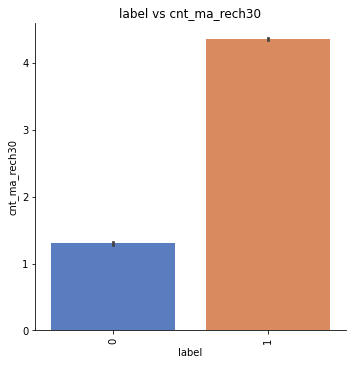

cnt_ma_rech30  label
0              1        16856
               0        11123
1              1        29561
               0         7677
2              1        27936
                        ...  
84             1            1
91             1            1
99             1            1
115            1            1
203            1            1
Name: label, Length: 103, dtype: int64


In [31]:
#Factor plot of label vs cnt_ma_rech30
plt.figure(figsize=(18,8))
sns.factorplot(x='label',y='cnt_ma_rech30',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('label vs cnt_ma_rech30')
plt.xticks(rotation='vertical')
plt.ylabel('cnt_ma_rech30')
plt.show()

print(df.groupby('cnt_ma_rech30')['label'].value_counts())

If the Number of times main account got recharged in last 30 days(cnt_ma_rech30) is more then there is less chance of default.

<Figure size 1296x576 with 0 Axes>

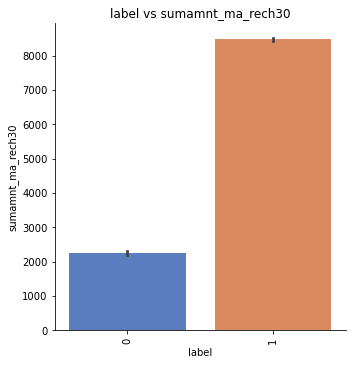

sumamnt_ma_rech30  label
0                  1        16856
                   0        11123
173                1          364
                   0           81
177                1            1
                            ...  
232000             1            1
247227             1            1
275010             1            1
299391             1            1
810096             1            1
Name: label, Length: 16417, dtype: int64


In [32]:
#Factor plot of label vs sumamnt_ma_rech30
plt.figure(figsize=(18,8))
sns.factorplot(x='label',y='sumamnt_ma_rech30',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('label vs sumamnt_ma_rech30')
plt.xticks(rotation='vertical')
plt.ylabel('sumamnt_ma_rech30')
plt.show()

print(df.groupby('sumamnt_ma_rech30')['label'].value_counts())

If Number of times main account got recharged in last 30 days(cnt_ma_rech30) is more then there is less chance of default.

<Figure size 1296x576 with 0 Axes>

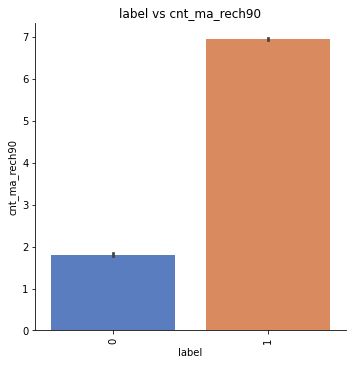

cnt_ma_rech90  label
0              1        11801
               0         9149
1              1        20409
               0         7489
2              1        20431
                        ...  
132            1            1
140            1            1
151            1            1
172            1            1
336            1            1
Name: label, Length: 150, dtype: int64


In [33]:
#Factor plot of label vs cnt_ma_rech90
plt.figure(figsize=(18,8))
sns.factorplot(x='label',y='cnt_ma_rech90',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('label vs cnt_ma_rech90')
plt.xticks(rotation='vertical')
plt.ylabel('cnt_ma_rech90')
plt.show()

print(df.groupby('cnt_ma_rech90')['label'].value_counts())

If Number of times main account got recharged in last 90 days(cnt_ma_rech90) is more then there is less chance of default.

<Figure size 1296x576 with 0 Axes>

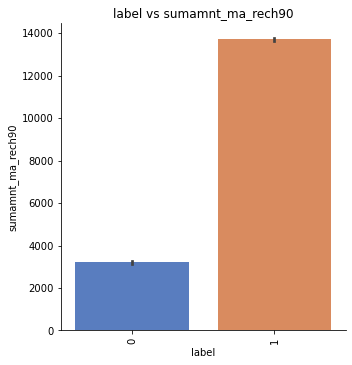

sumamnt_ma_rech90  label
0                  1        11801
                   0         9149
173                1          441
                   0          153
177                1            4
                            ...  
352813             1            1
383272             1            1
418133             1            1
429256             1            1
953036             1            1
Name: label, Length: 34069, dtype: int64


In [34]:
#Factor plot of label vs sumamnt_ma_rech90
plt.figure(figsize=(18,8))
sns.factorplot(x='label',y='sumamnt_ma_rech90',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('label vs sumamnt_ma_rech90')
plt.xticks(rotation='vertical')
plt.ylabel('sumamnt_ma_rech90')
plt.show()

print(df.groupby('sumamnt_ma_rech90')['label'].value_counts())

If Total amount of recharge in main account over last 30 days(sumamnt_ma_rech90) is more the chances of default is less

<Figure size 1296x576 with 0 Axes>

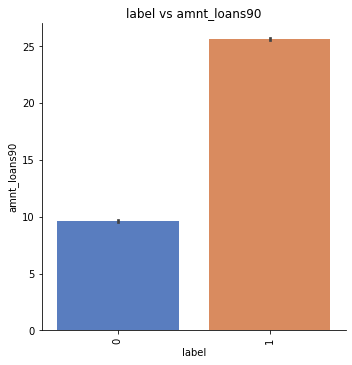

amnt_loans90  label
0             1         2043
6             1        50284
              0        18847
12            1        34941
              0         3967
                       ...  
396           1            1
402           1            1
408           1            4
426           1            1
438           1            1
Name: label, Length: 95, dtype: int64


In [35]:
#Factor plot of label vs amnt_loans90
plt.figure(figsize=(18,8))
sns.factorplot(x='label',y='amnt_loans90',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('label vs amnt_loans90')
plt.xticks(rotation='vertical')
plt.ylabel('amnt_loans90')
plt.show()

print(df.groupby('amnt_loans90')['label'].value_counts())

If Total amount of loans taken by user in last 90 days(amnt_loans90) is high there is less chance of default.

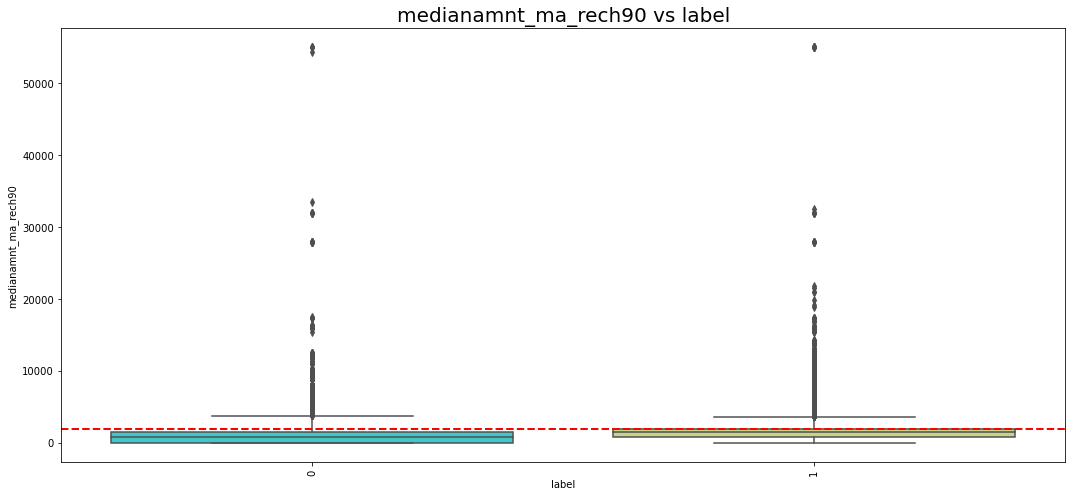

In [36]:
#label vs medianamnt_ma_rech90

plt.figure(figsize=(18,8))
mean_price=np.mean(df['medianamnt_ma_rech90'])
sns.boxplot(y='medianamnt_ma_rech90',x='label',data=df,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("medianamnt_ma_rech90 vs label",fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

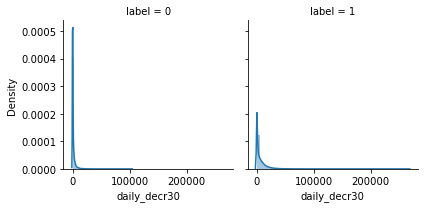

In [37]:
#Exploring label vs daily_decr30 via FaceGrid

facet= sns.FacetGrid(df, col='label')
facet.map(sns.distplot, "daily_decr30")
plt.show()

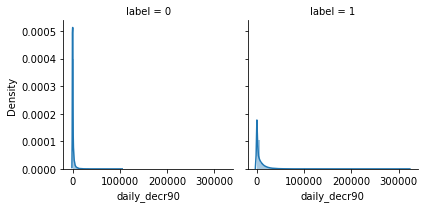

In [38]:
#Exploring label vs daily_decr90 via FaceGrid

facet= sns.FacetGrid(df, col='label')
facet.map(sns.distplot, "daily_decr90")
plt.show()

<AxesSubplot:xlabel='label', ylabel='cnt_ma_rech30'>

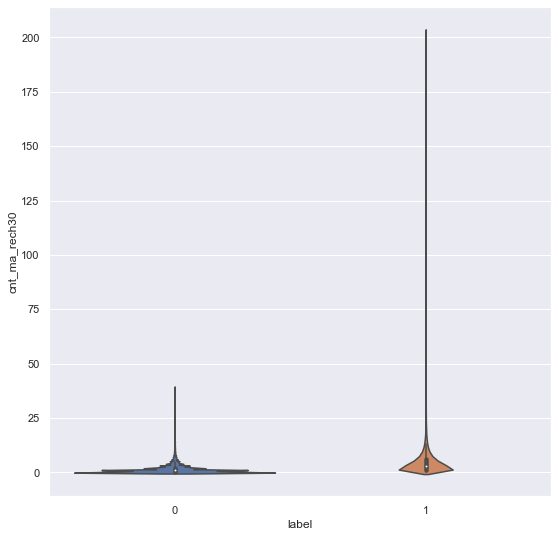

In [39]:
#Violinplot of label vs cnt_ma_rech30

sns.set(rc={'figure.figsize':(9,9)})
sns.violinplot(x=df['label'],y=df['cnt_ma_rech30'],data=df)

If Number of times main account got recharged in last 30 days(cnt_ma_rech30) is more then there is less chance of default.

# Dropping unnecessary column

In [40]:
df.drop(['Unnamed: 0','msisdn','pdate','pcircle','daily_decr30'],axis=1,inplace=True)

# Multivariate Analysis

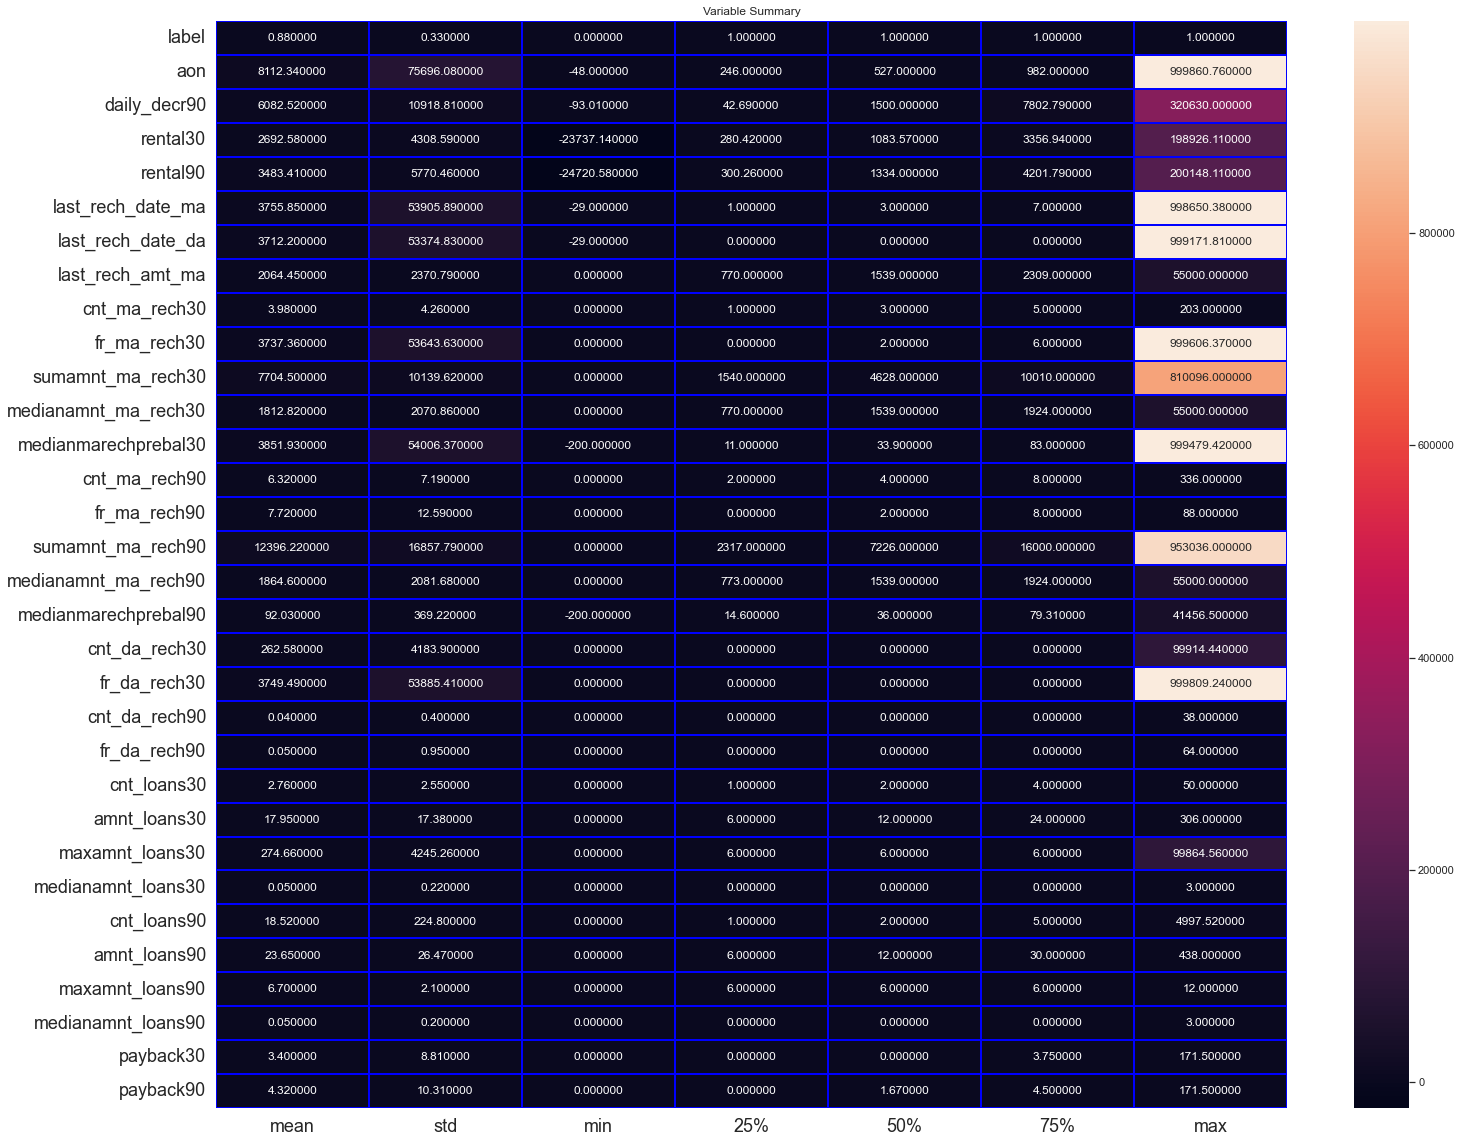

In [41]:
plt.figure(figsize=(24,20))
sns.heatmap(round(df.describe()[1:].transpose(),2),lw=2,linecolor='blue',annot=True,fmt='f',color='pink')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Variable Summary')
plt.show()

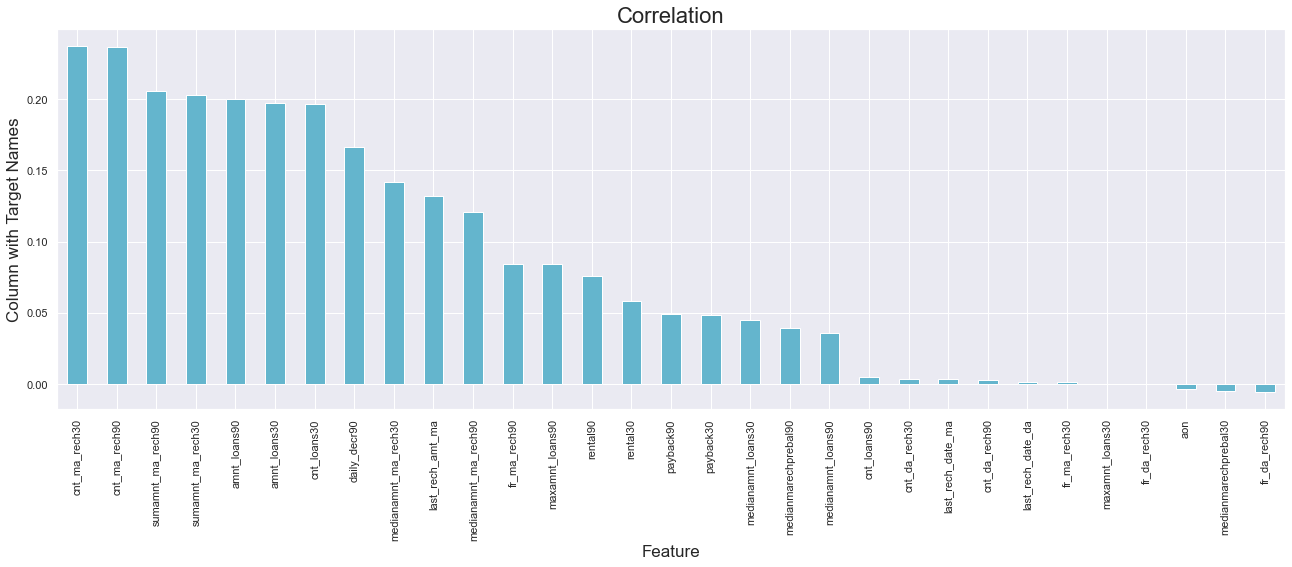

In [45]:
# Checking Correlation
dfc = df.corr()
plt.figure(figsize=(22,7))
dfc['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='c')
plt.ylabel('Column with Target Names',fontsize=17)
plt.xlabel('Feature',fontsize=17)
plt.title('Correlation',fontsize=22)
plt.show()

All the features except 'aon', 'medianmarechprebal30' and 'fr_da_rech90' are positively correlated to the target variable. 'maxamnt_loans30' and 'fr_da_rech30' have negligible relation to the target variable.

<AxesSubplot:>

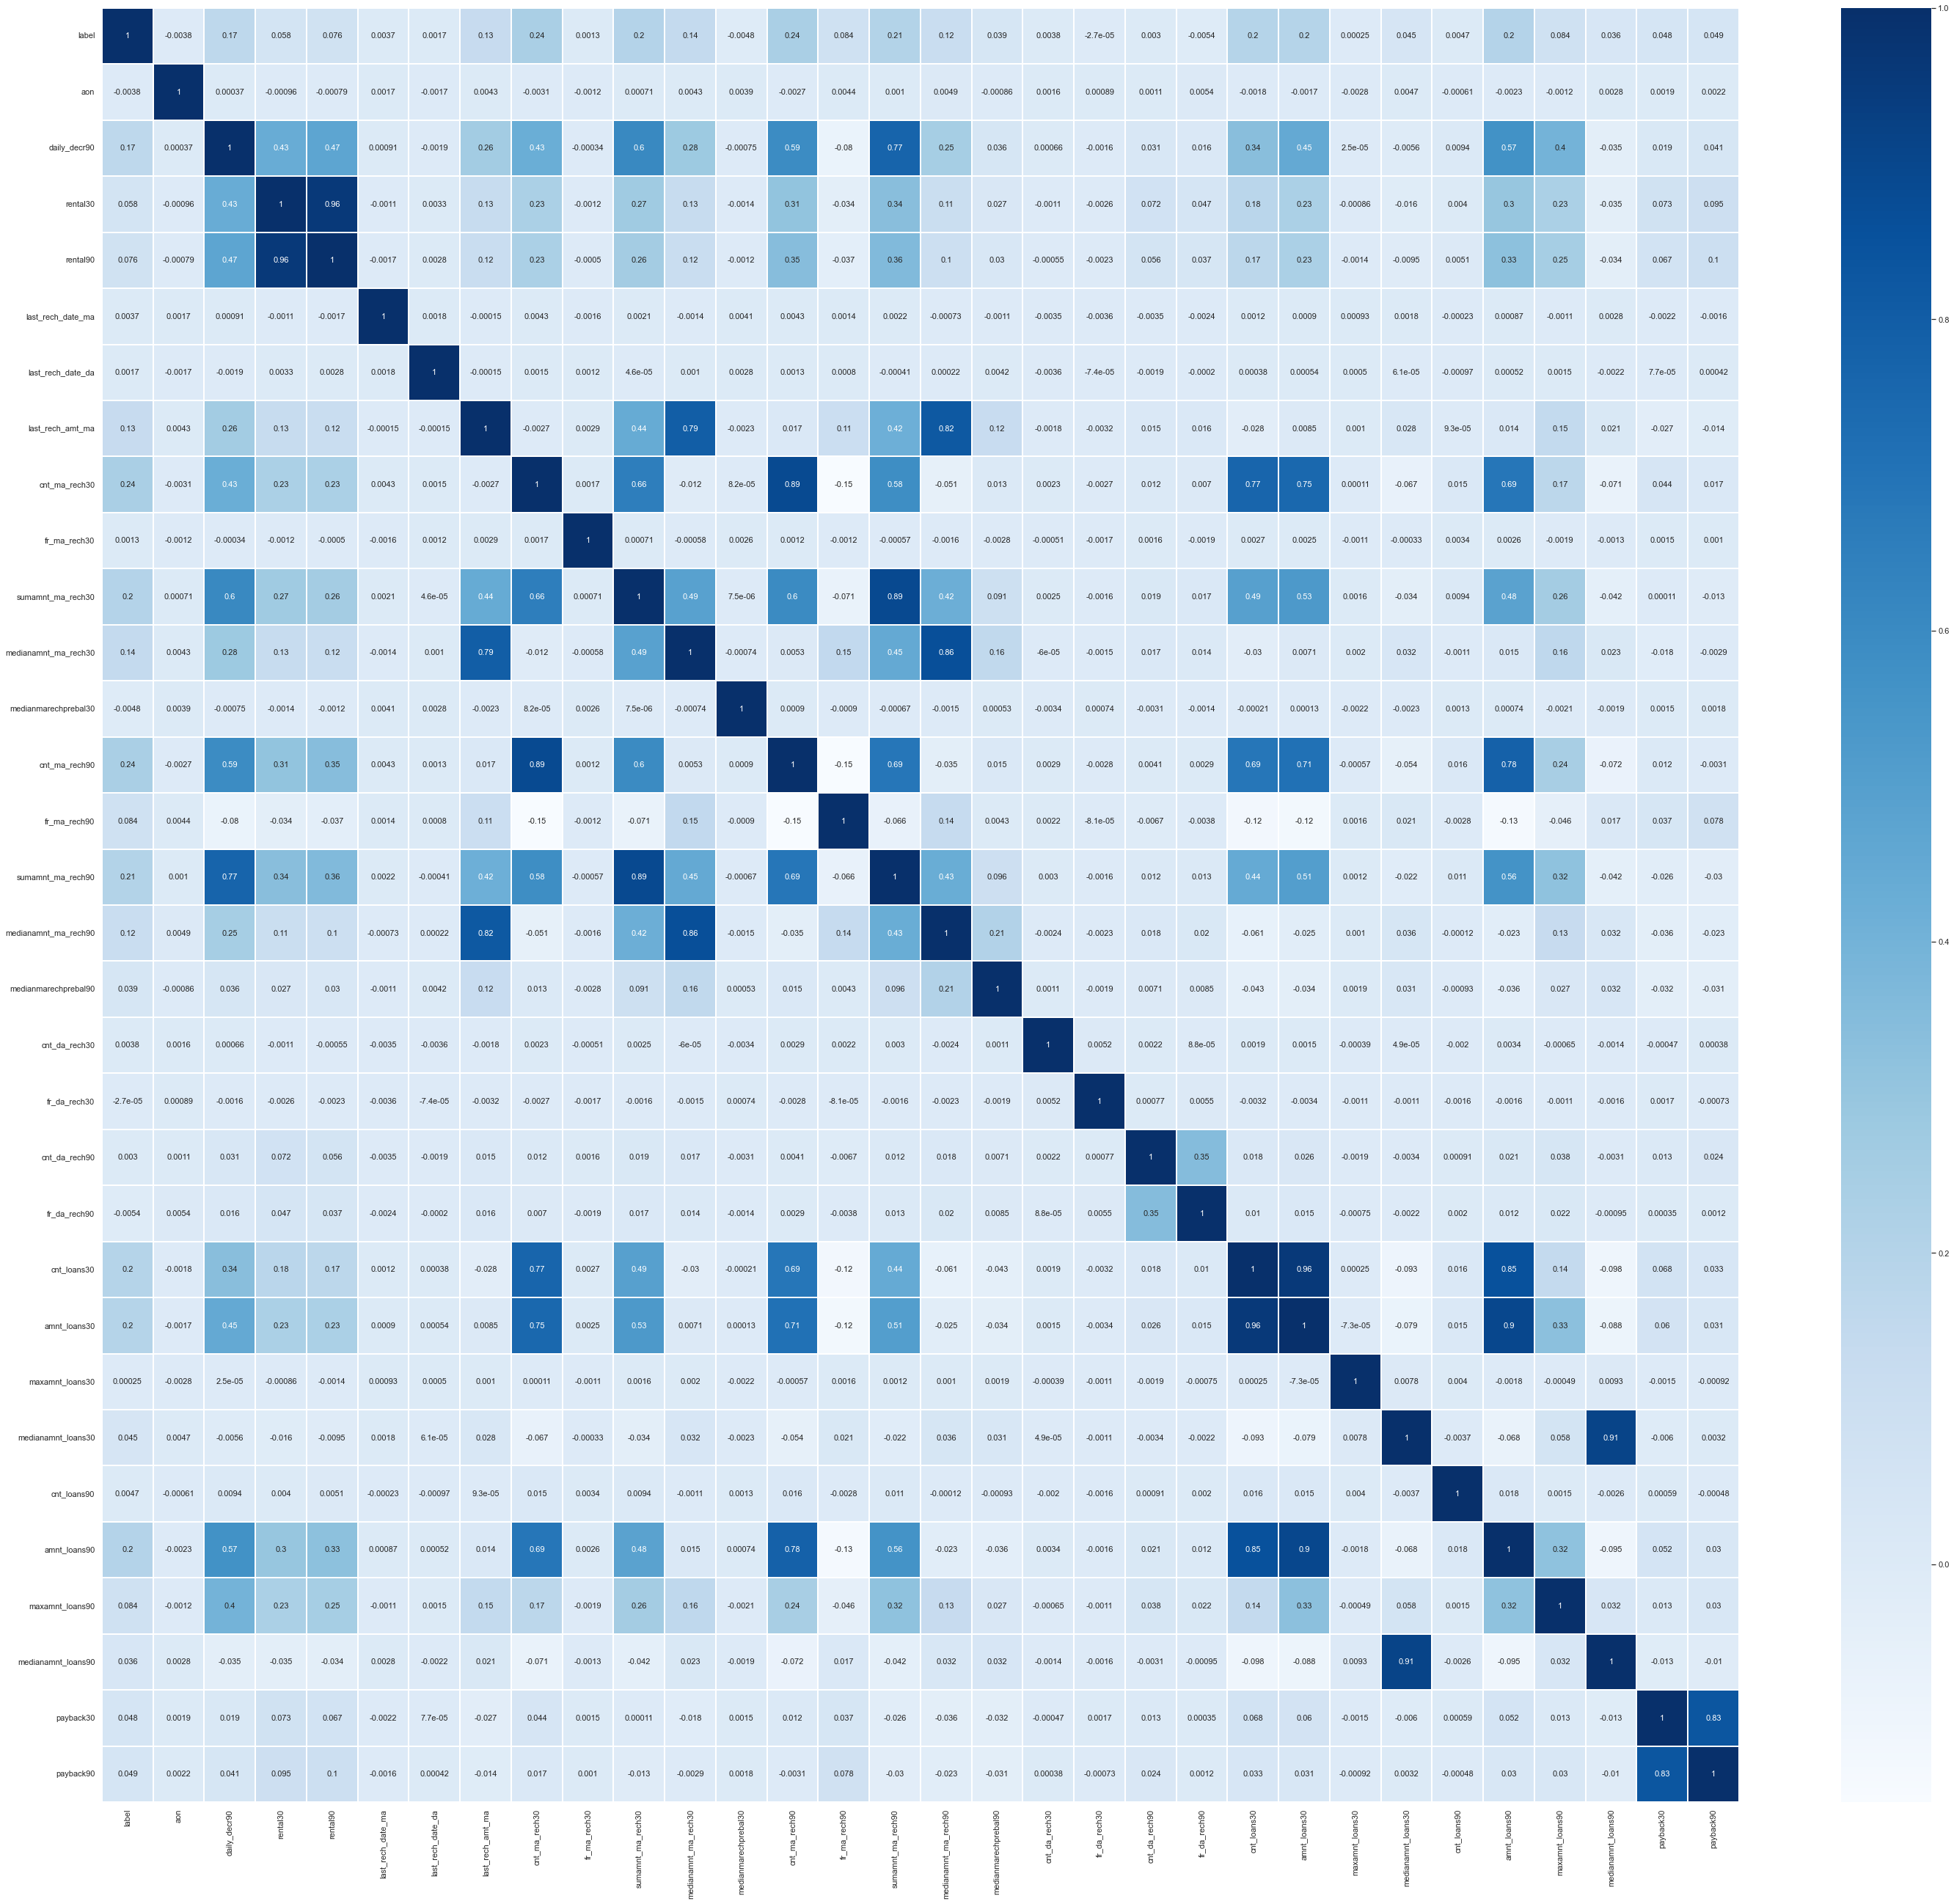

In [46]:
# plotting correlation on heatmap
plt.figure(figsize=(50,45))
sns.heatmap(df.corr(), linewidths=.1, cmap="Blues", annot=True, annot_kws={"size":11})

Multicollinearity exsits between 
-  'fr_da_rech30' and 'fr_da_rech90';
-  'maxamnt_loans30' and 'maxamnt_loans90' ;
-  'rental30' and 'rental90'; 
-  'cnt_ma_rech30' and 'cnt_ma_rech90' ; 
-  'sumamnt_ma_rech30' and 'sumamnt_ma_rech90' ;
-  'cnt_loans30' and 'cnt_loans90' ; 
-  'amnt_loans30' and 'amnt_loans90' ; 
-  'medianamnt_loans30' and 'medianamnt_loans90'

Hence will drop either column from each group which is least correlated with the target column.

<AxesSubplot:>

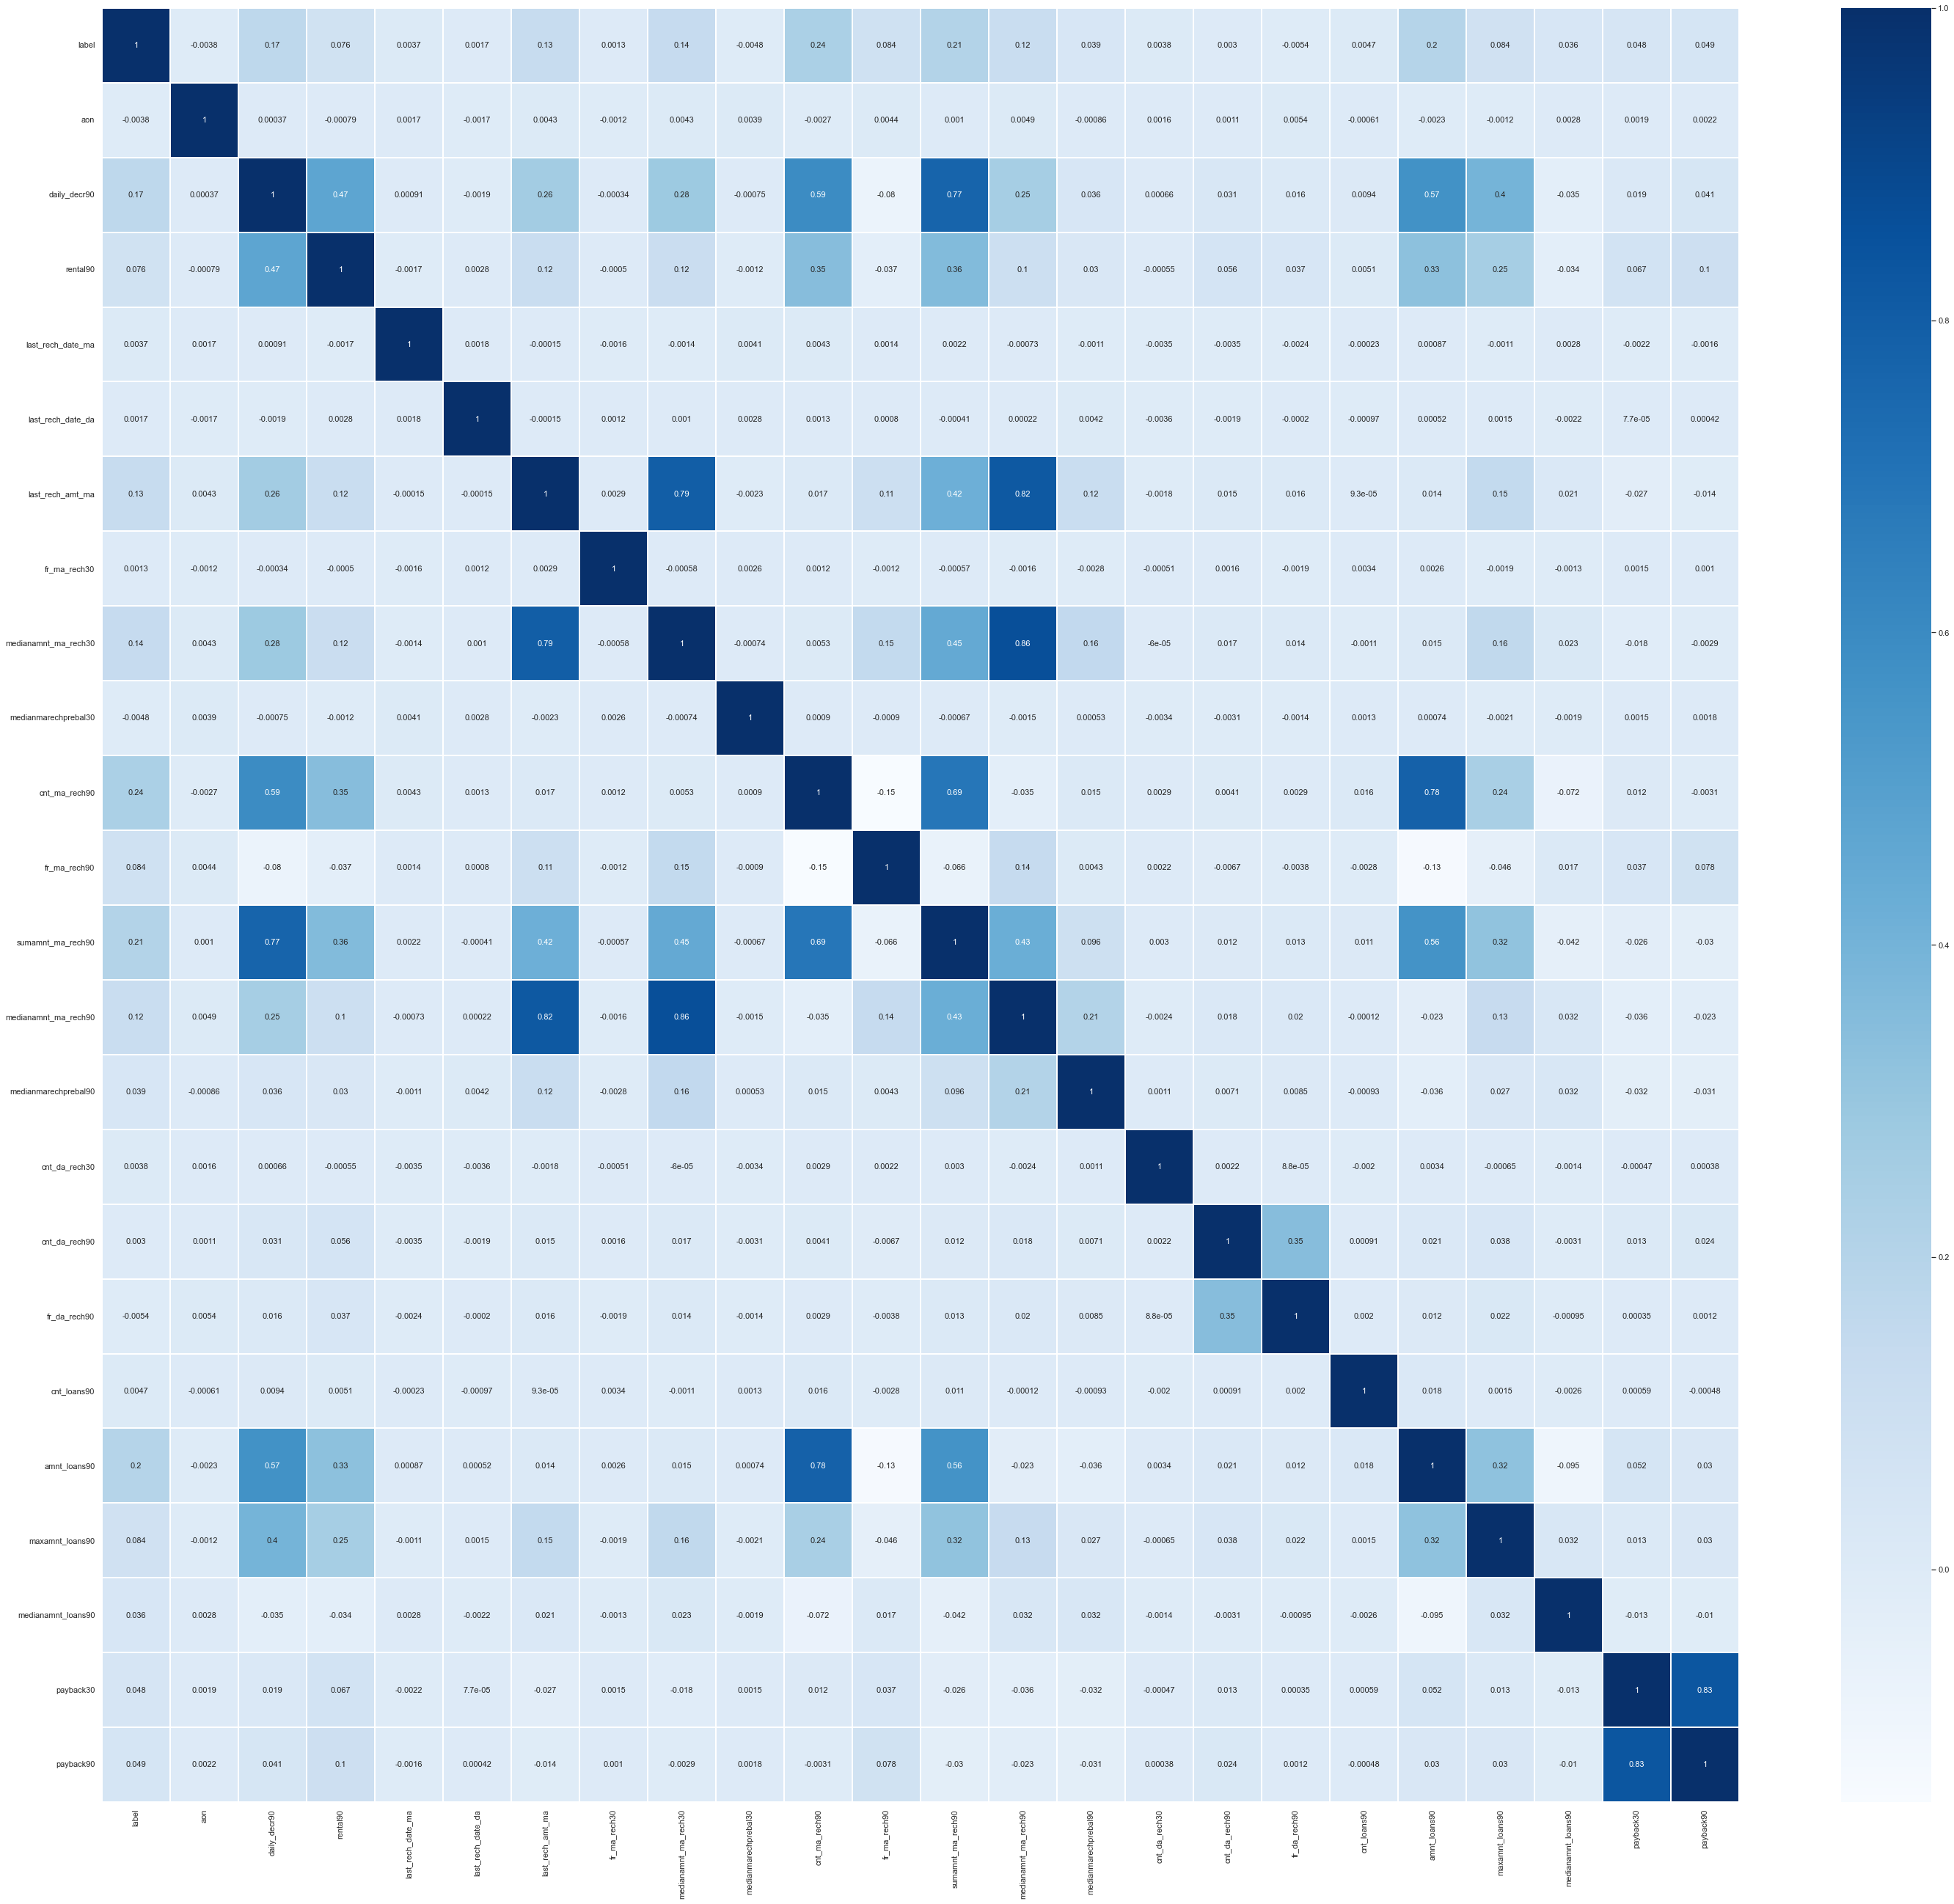

In [47]:
# Dropping the columns
df.drop(['fr_da_rech30','maxamnt_loans30','rental30','cnt_ma_rech30','sumamnt_ma_rech30','cnt_loans30','amnt_loans30','medianamnt_loans30'],axis=1,inplace=True)
plt.figure(figsize=(50,45))
sns.heatmap(df.corr(), linewidths=.1, cmap="Blues", annot=True, annot_kws={"size":11})

Multicollinearity has been reduced to the acceptable range.

# Data Cleaning

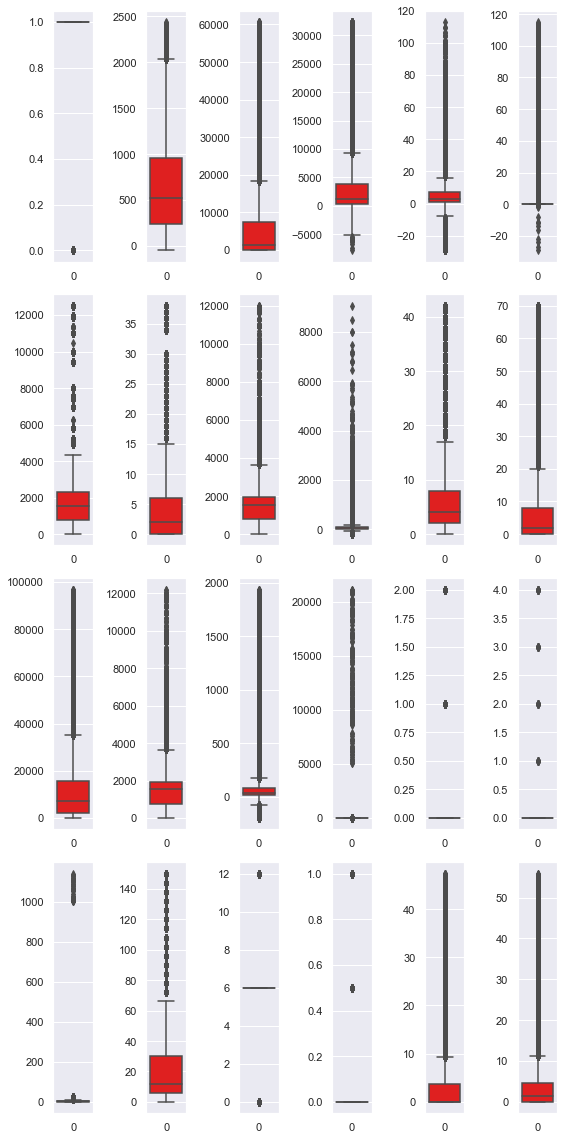

In [51]:
collist=df.columns.values
ncol=6
nrows=4
plt.figure(figsize=(2*nrows,4*nrows))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='red')
    plt.tight_layout()

In [50]:
# Using ZScore 
dfzscore=np.abs(zscore(df))
dfnew=df[(dfzscore<5).all(axis=1)]
df=dfnew
df

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,...,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3065.150000,260.13,2.0,0.0,1539,21.0,1539.0,7.50,...,7.50,0.0,0,0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12124.750000,3691.26,20.0,0.0,5787,0.0,5787.0,61.04,...,61.04,0.0,0,0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,0.0,1539.0,66.32,...,66.32,0.0,0,0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,159.42,41.0,0.0,947,0.0,0.0,0.00,...,2.50,0.0,0,0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,2.0,2309.0,29.00,...,35.00,0.0,0,0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,1089.19,1.0,0.0,4048,2.0,3178.0,91.81,...,91.81,0.0,0,0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,1728.36,4.0,0.0,773,1.0,773.0,161.30,...,111.80,0.0,0,0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11904.350000,8893.20,3.0,0.0,1539,8.0,1539.0,51.13,...,47.13,0.0,0,0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12574.370000,984.58,2.0,38.0,773,4.0,773.0,164.00,...,100.00,0.0,1,0,3.0,24,12,0.0,0.000000,10.500000


In [57]:
#Checking for data loss
print('Data Loss =', ((209593-193675)/209593)*100 , '%')

Data Loss = 7.594719289289241 %


# Checking for Skewness

In [58]:
df.skew()

label                   -2.250669
aon                      0.949928
daily_decr90             2.460761
rental90                 2.639322
last_rech_date_ma        3.100937
last_rech_date_da       10.004146
last_rech_amt_ma         2.212374
fr_ma_rech30             2.011830
medianamnt_ma_rech30     2.435568
medianmarechprebal30    10.950338
cnt_ma_rech90            1.843752
fr_ma_rech90             2.184523
sumamnt_ma_rech90        2.216341
medianamnt_ma_rech90     2.452949
medianmarechprebal90     4.843069
cnt_da_rech30           37.569139
cnt_da_rech90            7.448449
fr_da_rech90            73.793370
cnt_loans90             70.792807
amnt_loans90             2.167833
maxamnt_loans90          1.753878
medianamnt_loans90       4.440553
payback30                3.670435
payback90                3.406029
dtype: float64

# Removing Skewness

In [59]:
# Using Yeo-johnson method
x=df.drop(['label'],axis=1)
y=df['label']
from sklearn.preprocessing import power_transform
a=power_transform(x,method='yeo-johnson')

<AxesSubplot:xlabel='label', ylabel='count'>

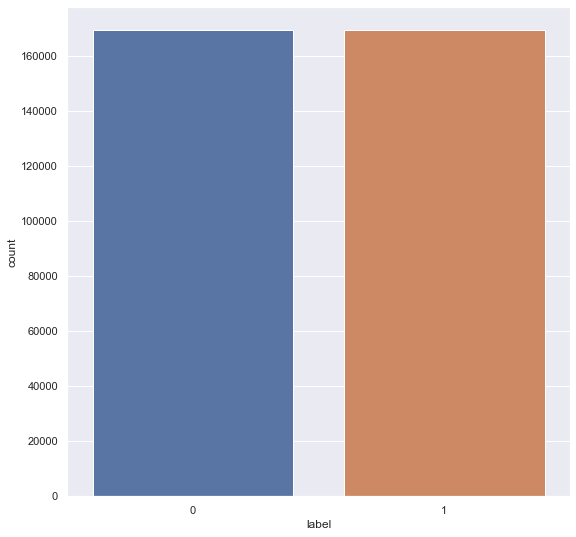

In [63]:
# Using Over-sampling method
smt=SMOTE()
x,y = smt.fit_resample(x,y)
sns.countplot(y)

The data is now balanced.

# Building the Model

In [78]:
# Scaling the feature
scale = StandardScaler()
x=scale.fit_transform(x)

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=54)

# Logistic Regression

In [68]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_train_lr=lr.predict(x_train)
predlr=lr.predict(x_test)
print('Accuracy Score of Logistic Regression is', accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy Score of Logistic Regression is 0.7681489141675284
[[27233  6481]
 [ 9213 24763]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78     33714
           1       0.79      0.73      0.76     33976

    accuracy                           0.77     67690
   macro avg       0.77      0.77      0.77     67690
weighted avg       0.77      0.77      0.77     67690



# SGD Classifier

In [72]:
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
sgd.score(x_train,y_train)
predsgd=sgd.predict(x_test)
print('Accuracy score of SGDClassifier is',accuracy_score(y_test,predsgd))
print(confusion_matrix(y_test,predsgd))
print(classification_report(y_test,predsgd))

Accuracy score of SGDClassifier is 0.7645442458265622
[[26399  7315]
 [ 8623 25353]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.77     33714
           1       0.78      0.75      0.76     33976

    accuracy                           0.76     67690
   macro avg       0.76      0.76      0.76     67690
weighted avg       0.76      0.76      0.76     67690



# Decision Tree Classifier

In [73]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print('Accuracy score of DecisionTree Classifier is',accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy score of DecisionTree Classifier is 0.8890087162062343
[[30319  3395]
 [ 4118 29858]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     33714
           1       0.90      0.88      0.89     33976

    accuracy                           0.89     67690
   macro avg       0.89      0.89      0.89     67690
weighted avg       0.89      0.89      0.89     67690



# Random Forest Classifier

In [79]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy score of RandomForest Classifier is',accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score of RandomForest Classifier is 0.9419559757719013
[[31718  1996]
 [ 1933 32043]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     33714
           1       0.94      0.94      0.94     33976

    accuracy                           0.94     67690
   macro avg       0.94      0.94      0.94     67690
weighted avg       0.94      0.94      0.94     67690



# Gradient Boosting Classifier

In [76]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print('Accuracy Score of GradientBoostingClassifier is',accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

Accuracy Score of GradientBoostingClassifier is 0.8795390751957453
[[30342  3372]
 [ 4782 29194]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     33714
           1       0.90      0.86      0.88     33976

    accuracy                           0.88     67690
   macro avg       0.88      0.88      0.88     67690
weighted avg       0.88      0.88      0.88     67690



# Cross Validation Score

In [81]:
print("CVS for Logistic Regression =",cvs(lr,x,y,cv=5).mean()*100,"%")
print("CVS for SGDClassifier =",cvs(sgd,x,y,cv=5).mean()*100,"%")
print("CVS for DecisionTree Classifier =",cvs(dt,x,y,cv=5).mean()*100,"%")
print("CVS for GradientBoostingClassifier =",cvs(gbc,x,y,cv=5).mean()*100,"%")
print("CVS for Random Forest Classifier =",cvs(rf,x,y,cv=5).mean()*100,"%")

CVS for Logistic Regression = 76.79791312033774 %
CVS for SGDClassifier = 76.47289991900924 %
CVS for DecisionTree Classifier = 88.47623165153273 %
CVS for GradientBoostingClassifier = 87.39334654527975 %
CVS for Random Forest Classifier = 93.64305447611055 %


'RandomForestClassifier' is best for hyper parameter tuning as it has the highest accuracy.

# Hyper Parameter Tuning

In [87]:
parameter={'n_estimators':np.arange(50,300,50),
          'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2'],
          'class_weight':['balanced', 'balanced_subsample']}
gvc = GridSearchCV(RandomForestClassifier(),parameter,cv=5)
gvc.fit(x_train,y_train)
gvc.best_params_

KeyboardInterrupt: 

In [84]:
Microcredit = RandomForestClassifier(criterion='entropy', n_estimators=200, max_features='sqrt', class_weight='balanced')
Microcredit.fit(x_train,y_train)
pred=Microcredit.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classifier of MicroCredit Label Prediction Model is ", acc*100, "%.")

Accuracy of Random Forest Classifier of MicroCredit Label Prediction Model is  94.2443492391786 %.


# AOC- ROC Curve

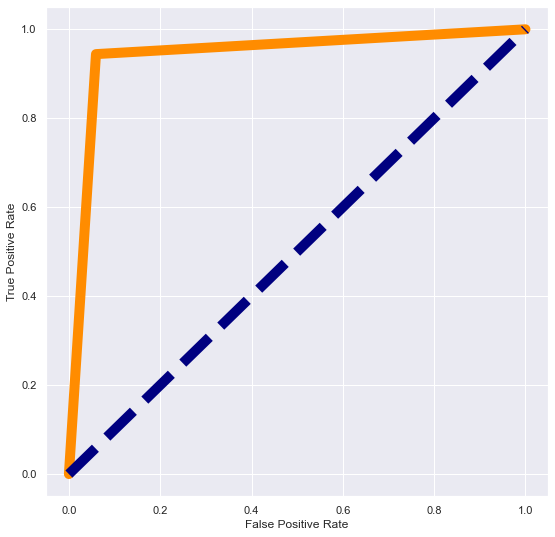

In [85]:
fpr,tpr,thresholds = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE")
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Conclusion

In [86]:
a= np.array(y_test)
predicted = np.array(Microcredit.predict(x_test))
mc=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
mc

,Original,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
67685,0,0
67686,1,1
67687,1,1
67688,0,0


# Saving the Model

In [88]:
filename = 'MicroCredit.pkl'
pickle.dump(Microcredit,open(filename,'wb'))